# INFORMACIÓN:

- __AUTOR:__ Miguel Puente Ajovín y Maximiliano Greco
- __FECHA:__ Agosto-2015
- __PYTHON:__ 3.k

# INDICE

- [DATOS](#DATOS)
    - [Número de Regiones y Variables: ](#Número-de-Regiones-y-Variables:)
    - [TASAS CRECIMIENTO](#TASAS-CRECIMIENTO)
    - [INDICES:](#INDICES:)
    - [SERIES FILTRADAS:](#SERIES-FILTRADAS:)
    - [VARIABLES AUXILIARES:](#VARIABLES-AUXILIARES:)


- [CORRELACIÓN:](#CORRELACIÓN:)
    - [RESÚMEN:](#RESÚMEN:)
    - [EXPORTAR:](#EXPORTAR:)



- [OUTLIERS:](#OUTLIERS:)
    - [REESTIMAR:](#REESTIMAR:)
        - [RESÚMEN:](#RESÚMEN:)
        - [EXPORTAR:](#EXPORTAR:)



- [FILTROS](#FILTROS:)
    - [HP](#FILTRO-HP)
        - [MCO HP-FILTER:](#MCO-HP-FILTER:)
    - [QT:](#FILTRO-QT:)

- [EVOLUCIÓN:](#EVOLUCIÓN:)

- [Apéndice:](#Apéndice:)


In [1]:
# python 3, compatibilidad:
# from __future__ import division, unicode_literals, print_function, absolute_import
import os
from datetime import datetime
from numpy import *
import statsmodels.api as sm
# import scipy as sp 

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
# import prettyplotlib as ppl

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


# Cambiamos el directorio de trabajo a la raíz

In [2]:
dir_raiz = u'/Users/mmngreco/Documents/repos/okun_ccaa/'
os.chdir(dir_raiz)
UTF = 'utf-8'

!open .

In [3]:
from def_utils import *

In [4]:
sns.set(style="white", color_codes=True)
# sns.set(style="ticks", palette="Set2")
sns.despine()
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.multi_sparse', False)

In [6]:
hoy = datetime.today()
hoy = str(hoy).replace(' ','_')

# DATOS

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [187]:
d_tipo = 'indices'
for v in variables:
    globals()['d'+v] = pd.read_excel('data_work/indices/%s.xls' % v, index_col=0)

dparo = dparo / 100
dpib = dpib.apply(log)

In [188]:
dwork = pd.concat([dempleo, dparo, dpib], keys=variables, axis=1)

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/pandas/core/index.py:1428: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  "incomparable objects" % e, RuntimeWarning)


In [189]:
dwork.head()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
tiempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,98.962765,98.421573,100.086271,97.054294,100.475004,103.619940,98.443078,96.762971,99.329305,99.292999,99.894981,94.142675,98.027086,99.229413,101.658106,101.430164,99.224823,100.719795,0.051850,0.110725,0.026850,0.037675,0.041350,0.086175,0.035200,0.04235,0.045200,0.038325,0.036600,0.084825,0.018550,0.052425,0.050900,0.03275,0.039475,0.015025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,97.420728,97.130121,97.571897,96.249014,100.032749,105.810458,100.375781,95.414827,97.561682,97.927958,99.719317,92.185599,94.950759,95.832786,102.896965,100.234731,96.803784,98.677794,0.069425,0.125175,0.047850,0.051075,0.043575,0.098850,0.044775,0.05275,0.060225,0.061250,0.047600,0.102650,0.025400,0.082900,0.060375,0.05435,0.070925,0.026125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,96.079663,96.752329,96.367896,94.066735,101.765769,106.544630,99.809504,94.183789,93.457920,96.780255,100.332859,87.301529,93.348074,93.404236,100.046081,98.703724,94.882858,94.911045,0.086350,0.138450,0.064775,0.073400,0.048300,0.106250,0.054975,0.06725,0.076650,0.079925,0.066425,0.134850,0.034025,0.103775,0.079575,0.08420,0.093575,0.041400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
dwork.tail()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
2011,144.840170,158.881044,128.859478,94.721236,204.872106,197.099380,133.318671,108.332675,145.624344,150.877317,152.528942,106.832279,88.431241,185.398932,183.589989,160.248891,126.366610,140.206955,0.216375,0.303875,0.170925,0.178550,0.219625,0.296900,0.152925,0.167350,0.229225,0.192500,0.244875,0.250975,0.174075,0.167300,0.254025,0.129375,0.12005,0.170050,5.380856,5.420636,5.410721,5.186451,5.542020,5.383003,5.204867,5.211802,5.436769,5.365394,5.361014,5.490693,5.182939,5.573874,5.419821,5.374410,5.165652,5.506465
2012,138.638999,150.782122,127.926351,90.326176,207.900451,190.660170,130.053488,104.048391,134.925443,142.640584,145.544883,97.102962,85.009254,180.815934,177.958311,153.645326,119.300915,132.177329,0.250275,0.345925,0.185800,0.217550,0.232625,0.330025,0.177250,0.197400,0.284750,0.226525,0.276550,0.330375,0.206650,0.189875,0.278875,0.162125,0.14880,0.204575,5.359503,5.392034,5.372631,5.151611,5.537022,5.368847,5.187422,5.181404,5.394690,5.345896,5.331192,5.455782,5.160304,5.569890,5.398511,5.347204,5.149441,5.477686
2013,134.771433,146.047580,120.648931,87.192589,209.565487,187.116418,123.527704,99.807244,132.087988,139.764620,142.945748,97.210588,81.702236,174.337720,173.793302,148.263964,115.446074,130.218169,0.263575,0.363375,0.213325,0.240375,0.223800,0.340650,0.205850,0.217375,0.301100,0.233700,0.286125,0.336950,0.220750,0.202375,0.293725,0.181000,0.15835,0.198950,5.347093,5.380569,5.365258,5.126266,5.531999,5.363742,5.164384,5.162712,5.385211,5.334432,5.323858,5.445278,5.150895,5.553793,5.385088,5.336937,5.130884,5.464037
2014,136.380682,149.608844,121.605666,88.821339,212.524767,189.453785,125.310230,100.194245,132.064553,142.651026,145.335299,101.255395,81.022947,174.215231,178.944116,150.762982,114.363813,134.114412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.360530,5.394104,5.382030,5.134786,5.550953,5.385009,5.174922,5.177281,5.396784,5.347967,5.343640,5.467211,5.156133,5.563884,5.405665,5.356355,5.143293,5.489091
2015,140.426871,156.697426,127.158924,88.158414,227.103393,198.845949,127.212617,102.006782,132.619998,144.977880,151.280662,103.025223,81.968484,183.069901,176.161344,151.679726,115.212323,135.537911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
dwork.dropna(axis=0, how='any', inplace=True)

In [192]:
dwork.head()

,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,empleo,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,paro,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib,pib
,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1980,93.465515,92.927827,93.771202,92.292505,98.980529,105.050183,97.611387,93.029685,90.161129,93.578697,96.685998,86.315556,90.329595,93.037726,94.555719,95.762477,92.217320,95.191726,0.114150,0.174100,0.086175,0.084075,0.080100,0.123225,0.074700,0.084500,0.106575,0.122325,0.097100,0.149875,0.050125,0.125350,0.098225,0.118700,0.123775,0.051975,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170,4.605170
1981,91.058134,91.183527,90.672381,89.363463,95.049024,101.283297,95.745806,91.172635,87.228499,91.068169,92.298128,85.360899,88.163908,92.042630,91.887880,93.745358,89.228981,93.141806,0.140300,0.197950,0.117900,0.117525,0.099725,0.162275,0.103125,0.103725,0.139500,0.153950,0.133325,0.165075,0.061200,0.143525,0.125500,0.130300,0.157150,0.074525,4.603405,4.590493,4.581428,4.616324,4.640930,4.614548,4.618668,4.548802,4.566837,4.594196,4.632444,4.573974,4.617363,4.612089,4.615862,4.637196,4.619023,4.644513
1982,90.218963,91.532938,91.229616,85.607570,94.418912,99.593609,90.018992,89.390048,88.986436,88.112648,90.406271,85.194632,88.326580,93.867227,92.494977,93.677619,87.034000,90.916845,0.158450,0.205375,0.122125,0.137075,0.117450,0.182175,0.124175,0.121575,0.137325,0.191550,0.167650,0.173825,0.075200,0.145000,0.152850,0.133800,0.181650,0.109950,4.618944,4.622469,4.631229,4.633604,4.672370,4.618977,4.637838,4.586477,4.574726,4.583923,4.633836,4.580302,4.636288,4.642633,4.610550,4.625001,4.641632,4.683803
1983,89.750160,91.493362,91.115750,85.004760,96.955407,101.442928,89.204198,88.735719,89.942407,85.630517,90.698133,87.999335,88.850490,92.812809,89.627896,92.825040,86.367822,89.523369,0.173275,0.224125,0.136825,0.138950,0.139275,0.191100,0.126075,0.135575,0.140825,0.210750,0.172675,0.163475,0.098900,0.167025,0.166225,0.155175,0.196150,0.112600,4.640896,4.642989,4.666571,4.647776,4.724203,4.658208,4.665353,4.626503,4.580153,4.602279,4.653630,4.609500,4.640954,4.677328,4.630892,4.645959,4.637061,4.718461
1984,87.371813,84.647889,87.999507,82.547703,97.932792,100.274291,88.199671,86.246936,87.592835,84.971253,89.480471,76.704382,87.831342,91.364489,91.943788,90.387822,85.032712,82.969340,0.200800,0.289050,0.151900,0.156600,0.140475,0.223525,0.159850,0.159875,0.162750,0.217375,0.194900,0.265225,0.116050,0.193875,0.168600,0.162300,0.216025,0.138225,4.655462,4.652214,4.710810,4.658094,4.779183,4.624661,4.678910,4.649695,4.612773,4.623178,4.674201,4.752844,4.649545,4.688131,4.639925,4.642823,4.605555,4.741859


- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

## VARIABLES AUXILIARES:

In [145]:
variables = ['empleo', 'paro', 'pib']
regiones = dwork['empleo'].columns # variable con los nombres de las ccaa
foot = u'FUENTE: Datos obtenidos de la web: INE.es, \nElaboración propia: Maximiliano Greco, @mmngreco' 

In [49]:
# con matplotlib
# fig = plt.figure(figsize=(15,15))
# data.du.boxplot(rot=90, ax=fig.add_subplot(311))
# data.dl.boxplot(rot=90, ax=fig.add_subplot(312))
# data.dy.boxplot(rot=90, ax=fig.add_subplot(313))

# plt.tight_layout()

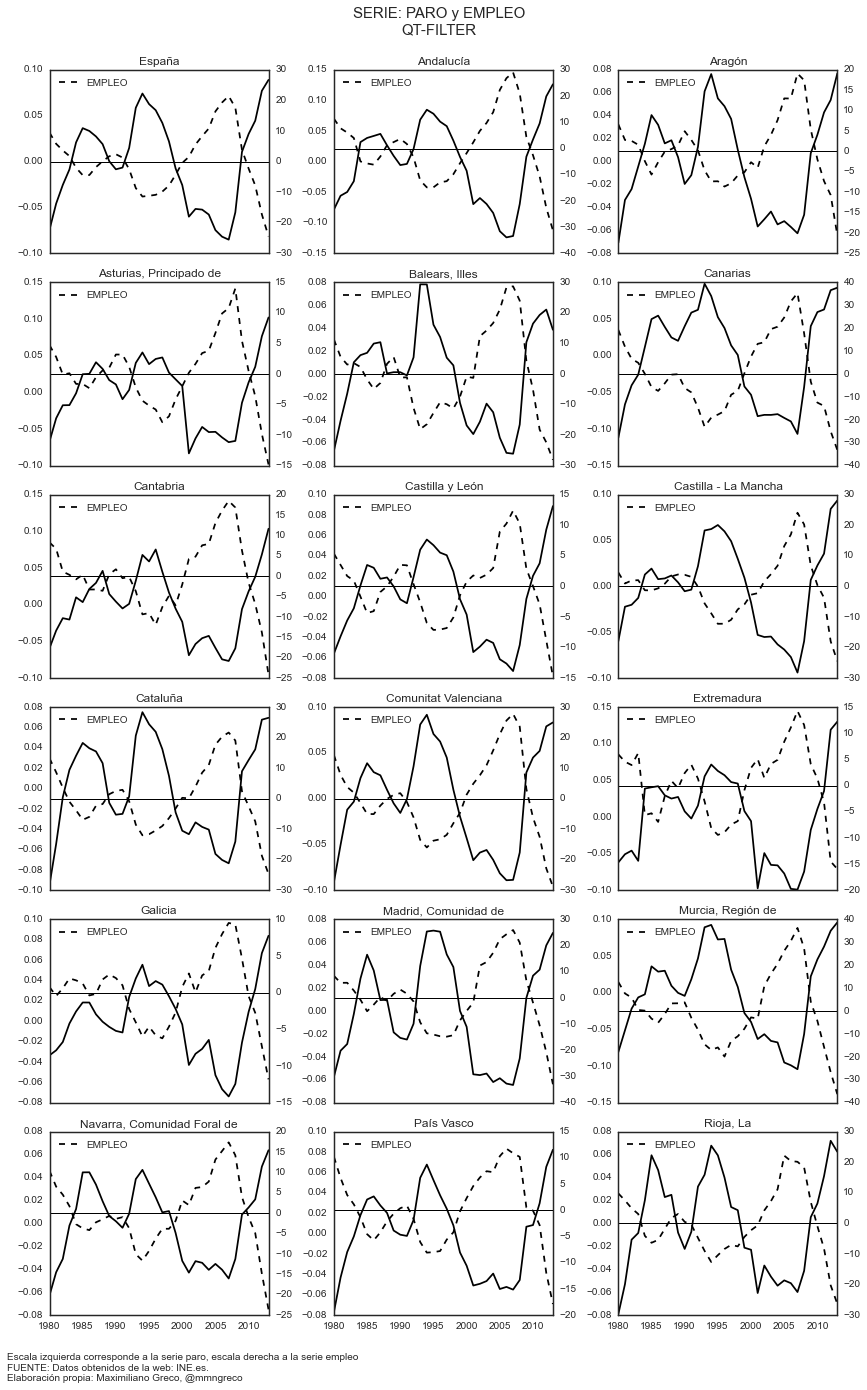

In [228]:
# PARAMETROS DEL GRÁFICO
id_x = 0
data = qts
d_tipo = 'qt-filter'
x = ['paro', 'empleo']
foot1 = '''Escala izquierda corresponde a la serie %s, escala derecha a la serie %s
FUENTE: Datos obtenidos de la web: INE.es.
Elaboración propia: Maximiliano Greco, @mmngreco''' % (variables[1], variables[0])

c = 'black'
ttl = 'SERIE: %s y %s\n%s' % (x[0].upper(), x[1].upper(), d_tipo.upper())
file_name = 'serie_%s_%s_%s_%s.png' % (x[0], x[1], d_tipo.upper(), hoy)

######## 

fig = plt.figure(figsize=(12,18))

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
    data[x[0]][reg].plot(ax=ax, label=x[0].upper(), color=c, sharex=True)
    data[x[1]][reg].plot(ax=ax, linestyle='--', label=x[1].upper(), secondary_y=True, color=c, sharex=True)
    plt.axhline(y=0, color='black', linewidth=1, axes=ax)
    plt.title(reg)
    plt.legend(loc='upper left')

plt.gcf().text(0, -0.03, "%s" % foot1, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.03)
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)

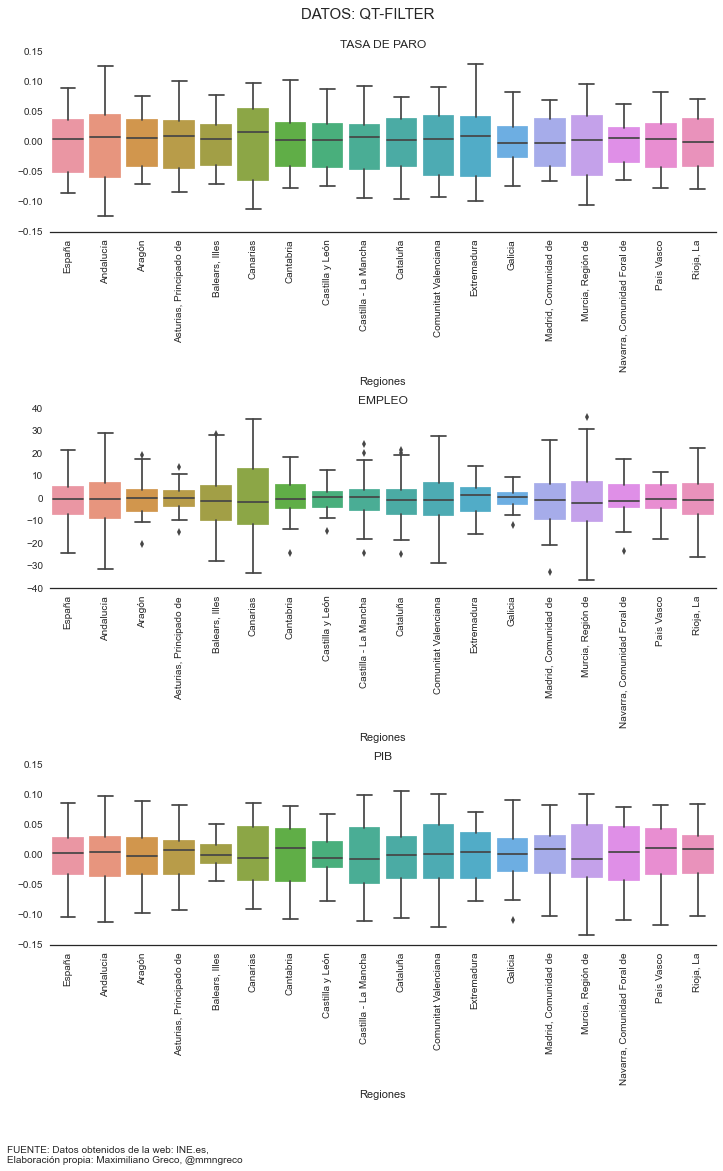

In [229]:
# i = id_xls
ttl = 'DATOS: %s' % (d_tipo.upper())
file_name = 'boxplot_%s_%s.png' % (d_tipo.upper(), hoy)


# con seaborn
fig = plt.figure(figsize=(10,15))
sns.set_palette('Greys')

g1 = sns.boxplot(data=data.paro, fliersize=5, width=.8, ax=fig.add_subplot(311))
g1.set_xticklabels(data.paro.columns, rotation=90)
g1.set_title('TASA DE PARO')

g2 = sns.boxplot(data=data.empleo, fliersize=5, width=.8, ax=fig.add_subplot(312))
g2.set_xticklabels(data.empleo.columns, rotation=90)
g2.set_title('EMPLEO')

g3 = sns.boxplot(data=data.pib, fliersize=5, width=.8, ax=fig.add_subplot(313))
g3.set_xticklabels(data.pib.columns, rotation=90)
g3.set_title('PIB')

sns.despine(left=True)

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

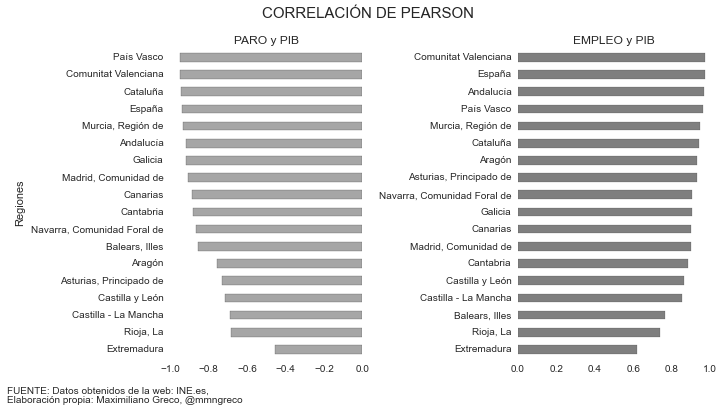

In [230]:
ttl = 'CORRELACIÓN DE PEARSON\n%s' % d_tipo.upper()
file_name = 'corr_%s_%s.png' % (d_tipo.upper(), hoy)

x = ['paro', 'empleo']
y = 'pib'

# ----------------------------

plt.figure(figsize=(10,5))

axs = [plt.subplot(121)]
data[x[0]].corrwith(data[y], axis=0).order(ascending=False).plot(kind='barh', color='grey', alpha=0.7)
plt.gca().set_title('%s y %s' % (x[0].upper(), y.upper()))

axs += [plt.subplot(122)]
data[x[1]].corrwith(data[y], axis=0).order(ascending=True).plot(kind='barh', color='black', alpha=0.5)
plt.gca().set_title('%s y %s' % (x[1].upper(), y.upper()))

plt.suptitle('CORRELACIÓN DE PEARSON', fontsize=15, x=0.5, y=1.05)

# Quitar las líneas del marco del eje.

for i, ax in enumerate(axs):
    if i == 1:
        ax.axes.get_yaxis().set_visible(True)
        ax.tick_params(labelleft='off')
        plt.ylabel('')
        ax.yaxis.tick_right()
    else:
        ax.axes.get_yaxis().set_visible(True)

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)  

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    ax.axes.get_xaxis().set_visible(True)

    ax.tick_params(axis='both',
                   which='both',
                   bottom='off',
                   top='off',
                   left='off',
                   labelbottom='on')

    
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

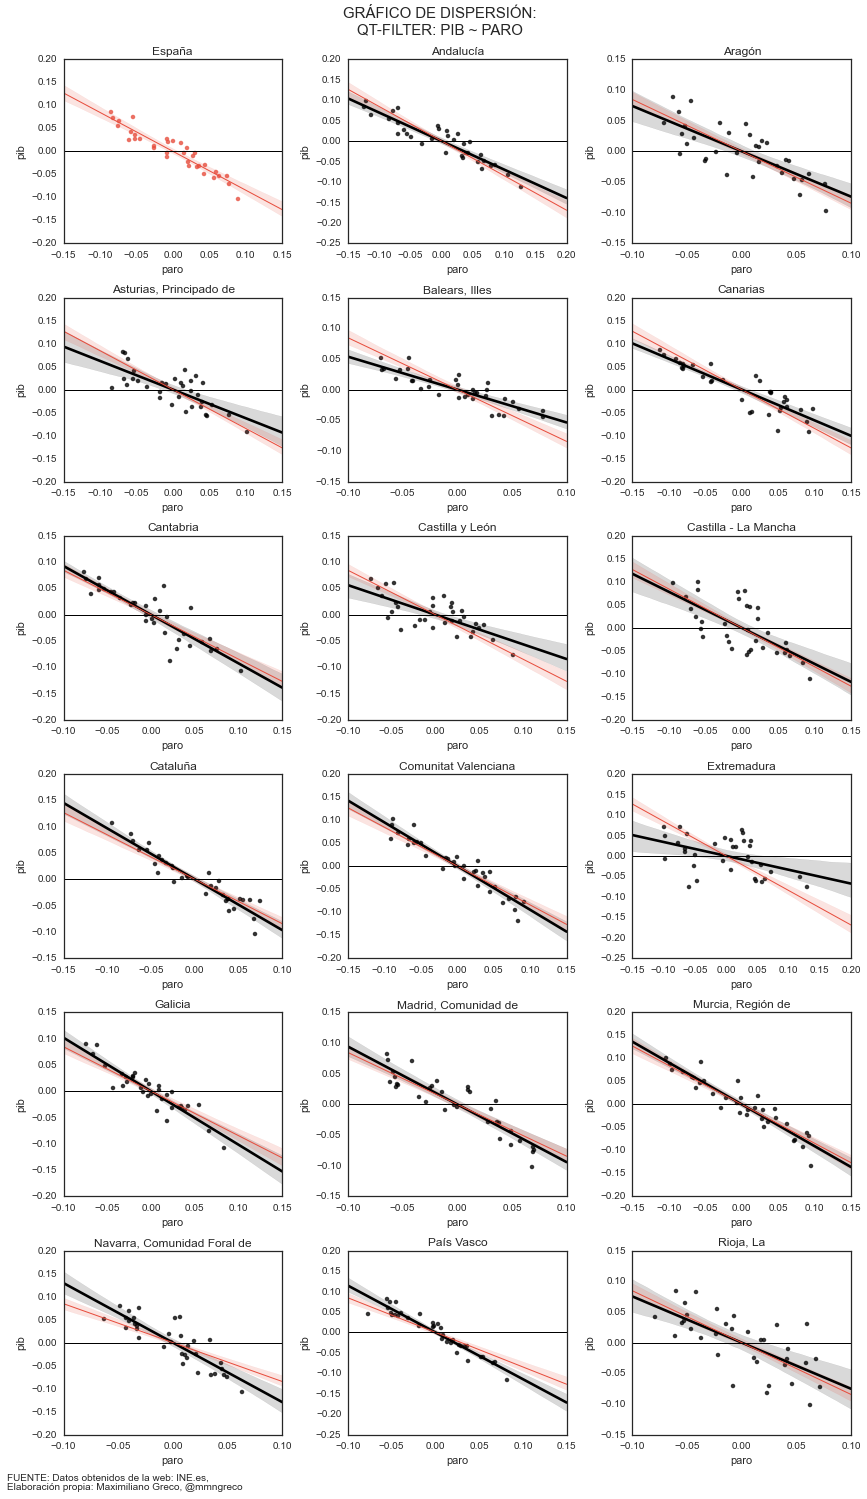

In [231]:
# PARAMETROS DEL GRÁFICO
id_x = 0
x = ['paro', 'empleo']
y = 'pib'

ttl = 'GRÁFICO DE DISPERSIÓN: \n%s: %s ~ %s' % (d_tipo.upper(), y.upper(), x[id_x].upper())
file_name = 'reg%s_%s_%s_%s.png' % (x[id_x].upper(), y.upper(), d_tipo, hoy)


######## 

fig = plt.figure(figsize=(12,20))

for i, reg in enumerate(regiones):
    if reg == 'España':
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color="#e74c3c", line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)

    else:
        ax = fig.add_subplot(len(regiones)/3, 3, i + 1)
        g = sns.regplot(y=data[y][reg], x=data[x[id_x]][reg], ax=ax, color='black')
        sns.regplot(y=data[y]['España'], 
                    x=data[x[id_x]]['España'], 
                    ax=ax, 
                    color="#e74c3c", 
                    scatter=False, 
                    line_kws={'linewidth': 1})
        plt.axhline(y=0, color='black', linewidth=1)
    g.set_xlabel(x[id_x])
    g.set_ylabel(y)
    g.set_title(reg)

plt.gcf().text(0, -0.01, "%s" % foot, fontsize=10, transform=(1,1))
plt.tight_layout()
plt.suptitle(t=ttl, fontsize=15, x=0.5, y=1.02)

plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

# MCO

# RESUMEN

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [125]:
y = 'pib'

In [128]:
data = crear_df([hp_empleo, hp_paro, hp_pib])
x = 'paro'
s, p, m = estimar_mco(data, exogena=x, endogena=y, regiones=regiones)
print(d_tipo)
resumen_mco(p, 1)

indices


,$β_0$,$pv_{β_0}$,$β_1$,$pv_{β_1}$,$R^2$
Extremadura,0.225844,0.838074,-43.132227,1.250323e-01,0.099259
"Rioja, La",0.395534,0.706989,-77.208432,3.140504e-02,0.185906
Castilla y León,0.231958,0.662687,-51.172125,1.156793e-02,0.246598
"Asturias, Principado de",0.293931,0.641447,-58.007679,6.875174e-03,0.277043
"Navarra, Comunidad Foral de",1.008391,0.352605,-153.968504,2.383357e-03,0.336167
Cataluña,0.751476,0.308661,-90.502665,1.158428e-04,0.482862
Aragón,0.584623,0.367618,-105.228461,5.827612e-05,0.511788
Castilla - La Mancha,0.827538,0.364217,-170.043325,2.792250e-05,0.541081
Cantabria,0.534843,0.455357,-109.726166,2.214341e-05,0.549965
Galicia,0.290903,0.523527,-103.794478,1.081383e-05,0.576401


# EXPORTAR:

In [27]:
# guardar_mco(sumrz_paro, 'modelos_u')

# guardar_mco(sumrz_empleo, 'modelos_l')

# FILTROS

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

## FILTRO HP

In [208]:
#for i in range(5):

id_x = 1  
#               0         1        2  # variable a filtrar
variables = ['empleo', 'paro', 'pib']

print('{:^60}'.format('FILTRO HP'))
print('HOJA %s' % d_tipo)

data = dwork.copy()

for v in variables:
    d = data[v].dropna(axis=0, how='all')
    d = d.iloc[:]

    ciclo, tendencia = sm.tsa.filters.hpfilter(d)
    globals()['hp_%s' % v] = ciclo # variable output
    print('Variable sin tendencia HP creada: %s' % ('hp_%s' % v))
    print(ciclo.head(2).ix[:,:2])
    print('')

                         FILTRO HP                          
HOJA indices
Variable sin tendencia HP creada: hp_empleo
        España  Andalucía
1980  9.749476  10.908162
1981  6.001890   7.321642

Variable sin tendencia HP creada: hp_paro
        España  Andalucía
1980 -0.057198  -0.065870
1981 -0.032784  -0.046333

Variable sin tendencia HP creada: hp_pib
        España  Andalucía
1980  0.037168   0.037914
1981  0.006199  -0.008789



In [209]:
hp_paro.tail()

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
2009,0.013144,0.009226,0.011304,-0.014069,0.032614,0.044758,-0.007648,-0.002563,0.012269,0.021755,0.032558,-0.017808,-0.021854,0.014500,0.025414,0.011876,0.005635,0.008278
2010,0.029990,0.032292,0.026378,0.009812,0.049008,0.061711,0.011514,0.016260,0.027045,0.032430,0.046961,0.005260,0.004353,0.032421,0.045582,0.018143,0.003231,0.018796
2011,0.041745,0.052988,0.044959,0.026762,0.057002,0.063171,0.025825,0.024343,0.039033,0.042799,0.052358,0.023492,0.022433,0.036250,0.060027,0.025520,0.020158,0.041237
2012,0.071530,0.091395,0.055059,0.063767,0.062524,0.087665,0.050131,0.052855,0.087047,0.072080,0.077382,0.100430,0.052874,0.056012,0.078563,0.054625,0.051125,0.070758
2013,0.080664,0.105137,0.077760,0.084544,0.046193,0.089603,0.078663,0.071247,0.095826,0.074464,0.080255,0.104479,0.064800,0.065659,0.087045,0.069812,0.062852,0.060092


In [211]:
x = 'paro'
y = 'pib'

hps = crear_df([hp_empleo, hp_paro, hp_pib])
s, b, m = estimar_mco(hps, 
                      endogena=y, 
                      exogena=x, 
                      regiones=regiones)

res = resumen_mco(b, 0)
res['sig'] = res['pv_b1'] < 0.05
res.ix[:,2:].sort_index()

,b1,pv_b1,R2,sig
Andalucía,-0.733269,8.793503e-12,0.771390,True
Aragón,-0.825737,1.652166e-07,0.580554,True
"Asturias, Principado de",-0.673005,5.742586e-06,0.479227,True
"Balears, Illes",-0.696296,1.538186e-06,0.519306,True
Canarias,-0.713850,5.447421e-11,0.744056,True
Cantabria,-0.918157,4.198093e-09,0.665285,True
Castilla - La Mancha,-0.875911,2.426696e-06,0.505778,True
Castilla y León,-0.603721,2.913676e-05,0.425488,True
Cataluña,-0.979750,9.877671e-16,0.870051,True
Comunitat Valenciana,-0.976168,6.587528e-16,0.873287,True


In [212]:
#hps.to_csv('data_work/filtrado/max/hp_data.csv')

# FILTRO QT:

- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

In [203]:

for i in range(3):
    id_v = i
    v = variables[id_v]

    file_name= 'qt_%s_%s' % (v, hoy)

    d = dwork[v]
#    d = data[v].dropna(how='all', axis=0)
#    d = d.iloc[:2005 - d.index.min()]

    globals()['qt_%s' % v] = sm.tsa.tsatools.detrend(d, order=2, axis=0)
    df = globals()['qt_%s' % v]

    globals()['qt_%s' % v] = DataFrame(df, index=d.index, columns=d.columns)
    print('Variable sin tendencia creada: qt_%s' % v)

    df = globals()['qt_%s' % v]


Variable sin tendencia creada: qt_empleo
Variable sin tendencia creada: qt_paro
Variable sin tendencia creada: qt_pib


In [204]:
qt_pib.tail(2)

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
2012,-0.072070,-0.082082,-0.071825,-0.056236,-0.031744,-0.069598,-0.069148,-0.047350,-0.077477,-0.075993,-0.094438,-0.052630,-0.075953,-0.059867,-0.092495,-0.074807,-0.074565,-0.072505
2013,-0.104182,-0.111794,-0.096863,-0.091635,-0.041975,-0.091225,-0.106311,-0.077292,-0.111192,-0.104698,-0.119731,-0.076331,-0.108462,-0.102590,-0.134263,-0.108279,-0.117246,-0.102194


In [206]:
x = 'paro'
y = 'pib'

qts = crear_df([qt_empleo, qt_paro, qt_pib])

s, b, m = estimar_mco(qts, 
                      endogena=y, 
                      exogena=x, 
                      regiones=regiones)

res = resumen_mco(b, 0)
res['sig'] = res['pv_b1'] < 0.05
res.ix[:,2:].sort_index()

,b1,pv_b1,R2,sig
Andalucía,-0.696537,1.866433e-14,0.843988,True
Aragón,-0.739129,2.109725e-07,0.574229,True
"Asturias, Principado de",-0.622985,8.693528e-07,0.535740,True
"Balears, Illes",-0.536509,8.962328e-11,0.736049,True
Canarias,-0.669863,2.165038e-12,0.790415,True
Cantabria,-0.925254,7.590385e-12,0.773465,True
Castilla - La Mancha,-0.783539,7.203901e-06,0.472019,True
Castilla y León,-0.562315,2.068984e-06,0.510550,True
Cataluña,-0.967668,5.534263e-17,0.891394,True
Comunitat Valenciana,-0.950541,2.287593e-17,0.897209,True


In [207]:
#qts.to_csv('data_work/filtrado/max/qt_data.csv')

# EVOLUCIÓN:

In [218]:
d_tipo = 'hp-filter'
data = hps

desde = data.index.min()
hasta = desde + 10
fin = data.index.max()

id_x = 0 

y = variables[-1]
x = variables[id_x]

print('VARIABLE:', y.upper(), '~', x.upper())
print('ESTIMACIÓN:\n    Desde:\t%s\n    Hasta:\t%s\n    Fin:\t%s\nAñadiendo un año más a la muestra.' % (desde, hasta, fin))

b0_evolucion = DataFrame(columns=regiones)
b1_evolucion = DataFrame(columns=regiones)
# umbral_evolucion = DataFrame(columns=regiones)


while hasta <= fin:
    s, p, m = estimar_mco(data.iloc[:hasta - desde + 1], 
                          endogena=y, 
                          exogena=x, 
                          regiones=regiones)

    b0_evolucion.loc[hasta] = resumen_mco(p, 0).b0.T
    b1_evolucion.loc[hasta] = resumen_mco(p, 0).b1.T

    if hasta == 2004: 
        print('MCO 2004:\n')
        print(resumen_mco(p, 0)[['b0', 'b1']])

    hasta += 1

evolucion_okun = crear_df([b0_evolucion, b1_evolucion], keys=['b0', 'b1'])
evolucion_okun.head()

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/Users/mmngreco/anaconda/envs/py3/lib/python3

VARIABLE: PIB ~ EMPLEO
ESTIMACIÓN:
    Desde:	1980
    Hasta:	1990
    Fin:	2013
Añadiendo un año más a la muestra.
MCO 2004:

                                   b0        b1
Rioja, La                    0.001266  0.000692
Balears, Illes               0.004263 -0.000455
Extremadura                  0.000722  0.001586
Castilla y León              0.001232  0.002727
Asturias, Principado de      0.001919  0.003920
Cantabria                    0.005037  0.003981
Castilla - La Mancha         0.004103  0.005394
Aragón                       0.002929  0.004058
Madrid, Comunidad de         0.003215  0.002776
Galicia                     -0.000779  0.005211
Canarias                     0.004273  0.002634
Navarra, Comunidad Foral de  0.004016  0.006250
Cataluña                     0.005179  0.004334
Andalucía                    0.004503  0.003568
España                       0.003763  0.004063
Murcia, Región de            0.003615  0.003467
Comunitat Valenciana         0.004719  0.004232
País Vasc

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


Variables,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1
Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
1990,-0.006664,-0.006722,-0.001940,0.003348,-0.000156,-0.010259,-0.004018,0.000950,-0.032422,-0.013020,-0.005843,0.004503,-0.028745,0.002276,-0.009792,0.002238,0.003291,-0.015870,0.004820,0.003620,0.003250,-0.000746,-0.002704,0.004119,0.003406,0.001208,0.017393,0.006812,0.003768,-0.004734,0.021378,0.001557,0.005519,0.004756,0.006022,0.001173
1991,-0.004385,-0.003575,0.000252,0.004586,0.004043,-0.008020,-0.002204,0.001527,-0.029830,-0.011297,-0.002203,0.009647,-0.024767,0.005098,-0.007049,0.004638,0.003757,-0.008570,0.004897,0.003746,0.003653,-0.000385,-0.003143,0.003823,0.003224,0.001414,0.018109,0.007023,0.003590,-0.003580,0.019900,0.001475,0.005171,0.004621,0.006055,0.000687
1992,-0.002164,-0.000622,0.001835,0.007194,0.002129,-0.003969,-0.001318,0.001318,-0.017599,-0.008961,-0.000175,0.012198,-0.006612,0.004918,-0.004119,0.004035,0.002394,-0.002781,0.004527,0.003388,0.003542,-0.000616,-0.002752,0.002907,0.003142,0.001428,0.015161,0.006956,0.003188,-0.003447,0.008656,0.001500,0.004589,0.004739,0.006169,-0.000274
1993,-0.001543,-0.000116,0.000865,0.004573,-0.002805,-0.002047,-0.003145,0.000944,-0.004927,-0.005840,-0.001033,0.010122,-0.003828,0.000994,-0.002879,0.002873,0.000628,-0.002084,0.004308,0.003248,0.003852,0.000342,-0.001466,0.002203,0.003550,0.001539,0.010305,0.006185,0.003491,-0.003104,0.006717,0.002591,0.004253,0.005287,0.006746,-0.000447
1994,-0.000998,0.000093,-0.000157,0.002374,-0.005039,-0.001494,-0.002747,0.001081,0.000813,-0.002940,-0.001467,0.006262,-0.001943,-0.000703,-0.002084,0.002681,-0.000352,-0.002792,0.004070,0.003179,0.004285,0.001405,-0.000921,0.002051,0.003393,0.001472,0.007748,0.005188,0.003675,-0.001700,0.005184,0.003172,0.004008,0.005396,0.007195,-0.000215


In [219]:
evolucion_okun.tail()

Variables,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b0,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1,b1
Regiones,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
2009,2.844703e-03,3.480029e-03,3.005118e-03,4.076413e-03,8.042896e-03,3.033677e-03,4.330392e-03,3.573452e-03,1.707101e-03,3.251030e-03,2.700870e-03,4.682035e-03,2.478727e-03,3.094812e-03,1.856548e-03,1.108090e-03,1.401898e-04,6.339173e-03,0.003858,0.003325,0.004187,0.004879,0.000404,0.002419,0.003887,0.003900,0.004642,0.003815,0.003780,0.002983,0.006997,0.002809,0.003112,0.005292,0.007067,0.002067
2010,2.546388e-03,2.934935e-03,3.191340e-03,3.610212e-03,6.537175e-03,3.007877e-03,3.786881e-03,3.215018e-03,1.829756e-03,2.949074e-03,2.564111e-03,4.476495e-03,2.681920e-03,2.534695e-03,1.731212e-03,7.742046e-04,-4.675258e-05,5.797919e-03,0.003869,0.003340,0.004179,0.004858,0.000443,0.002420,0.003892,0.003898,0.004643,0.003827,0.003788,0.002977,0.006996,0.002815,0.003115,0.005301,0.007068,0.002070
2011,1.909646e-03,2.202035e-03,2.952612e-03,2.990306e-03,4.714553e-03,2.166905e-03,2.667997e-03,2.725268e-03,1.422080e-03,1.932334e-03,1.975143e-03,3.651407e-03,2.057639e-03,1.906604e-03,1.632013e-03,4.255126e-04,-5.442629e-04,4.505079e-03,0.003926,0.003395,0.004209,0.004905,0.000606,0.002477,0.003971,0.003940,0.004658,0.003917,0.003842,0.003042,0.007054,0.002854,0.003122,0.005331,0.007105,0.002159
2012,9.786361e-04,1.060893e-03,1.137726e-03,1.640307e-03,2.468148e-03,1.076114e-03,1.239204e-03,1.404831e-03,7.809386e-04,1.009501e-03,9.767084e-04,2.015305e-03,9.556690e-04,1.066350e-03,9.452655e-04,1.967194e-05,-2.056898e-04,2.356973e-03,0.004093,0.003556,0.004509,0.005230,0.000830,0.002594,0.004181,0.004285,0.004777,0.004090,0.003989,0.003535,0.007373,0.002951,0.003197,0.005424,0.007008,0.002516
2013,-9.187028e-13,-9.730077e-13,-5.556653e-13,-7.233166e-13,-6.146871e-13,-4.600643e-13,-9.553898e-13,-9.105340e-13,-6.815399e-13,-6.225892e-13,-7.599988e-13,-7.485089e-13,-6.846893e-13,-7.017275e-13,-7.342347e-13,-7.105952e-13,-7.165939e-13,-5.567265e-13,0.004330,0.003752,0.004859,0.005821,0.001124,0.002740,0.004508,0.004879,0.004965,0.004326,0.004162,0.004169,0.007821,0.003141,0.003330,0.005431,0.006926,0.003001


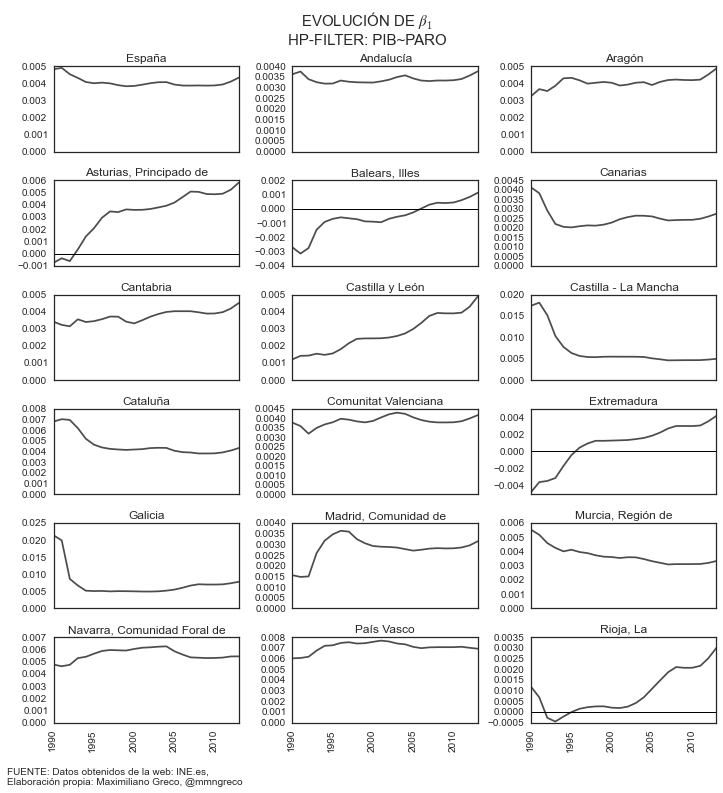

In [222]:
fig = plt.figure(figsize=(10,10))
x = 'paro'
y = 'pib'
p = 'b1'

ttl= 'EVOLUCIÓN DE $β_%s$\n%s: %s~%s' % (p[-1],d_tipo.upper(), y.upper(), x.upper())
file_name = 'evolucion_%s_%s_%s_%s.png' % (d_tipo, y, p, hoy)

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(6,3,i+1)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, sharex=True, color='black', alpha=0.7)
    plt.title(reg)
    plt.xticks(evolucion_okun.index[::5], evolucion_okun.index[::5], rotation=90)
    plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

plt.gcf().text(0, -0.03, "%s" % foot, fontsize=10, transform=(1,1))
plt.suptitle(x=0.5, y=1.05, t=ttl, fontsize=15)
plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=150)

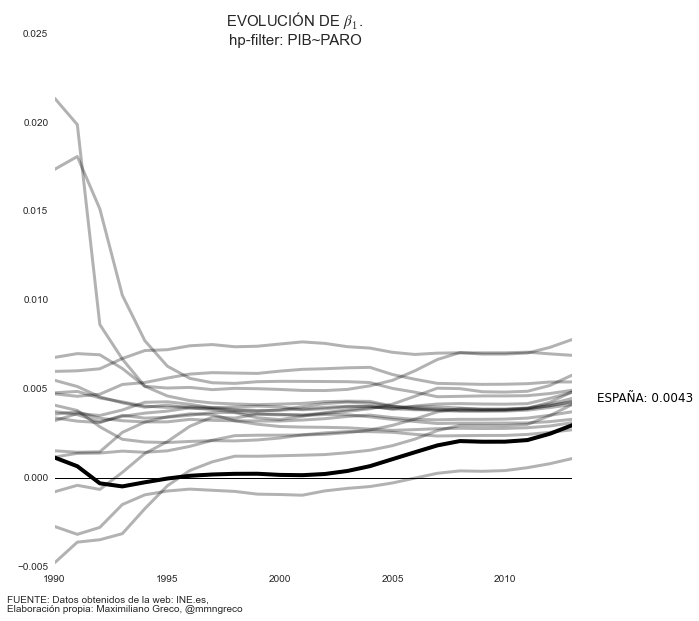

In [223]:
fig = plt.figure(figsize=(8,8), dpi=200)
x = 'paro'
y = 'pib'
ttl= 'EVOLUCIÓN DE $β_%s$.\n%s: %s~%s' % (p[-1],d_tipo, y.upper(), x.upper())
file_name = 'evolucion_%s_%s_%s_%s_todas.png' % (d_tipo, y, p, hoy)

c = '#' + '000000'
c1 = '#' + '000000'

for i, reg in enumerate(regiones):
    ax = fig.add_subplot(111)
    plt.axhline(y=0, color='black', linewidth=1)
    evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=0.3, linewidth=3, color=c1)

evolucion_okun[p][reg].plot(ax=ax, label=reg, alpha=1, color=c, linewidth=4)

plt.xticks(evolucion_okun.index[::5])
plt.xlim(evolucion_okun.index.min(), evolucion_okun.index.max())

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)

ax.tick_params(axis='both',
               which='both',
               bottom='off',
               top='off',
               left='off',
               labelbottom='on',
               labelleft='on')

plt.text(2014.1, 
         evolucion_okun[p]['España'].values[-1], 
         'ESPAÑA: {:.4f}'.format(evolucion_okun[p]['España'].values[-1]),
         fontsize=12,
         family='bold',
         color=c)



plt.gcf().text(0, 
               -0.03, 
               "%s" % foot, 
               fontsize=10, 
               transform=(1,1))

plt.suptitle(x=0.5, y=1.02, t=ttl, fontsize=15)

plt.tight_layout()
plt.savefig('imgs/%s' % file_name, bbox_inches='tight', dpi=200)


- [🏠INDICE: ](#INDICE)
- [📈MCO](#MCO) 
- [📊datos](#DATOS)
- [🔨FILTROS](#FILTROS)

# BIBLIOGRAFÍA:

- [Estadisticas Robustas](link1)
- [Correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)
- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)
- [Criterio de Outliers](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico)


[link1]:https://en.wikipedia.org/wiki/Robust_statistics#Definition

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# Apéndice:

# Markdown Sintaxis:
- [Footnote](http://rephrase.net/box/word/footnotes/syntax/)
- [Sintaxis, guía](http://daringfireball.net/projects/markdown/syntax#link)

![](http://cdn.churchm.ag/wp-content/uploads/2014/01/markdown-cheatsheet.png)

# REGRESIÓN:

Método de estimación:
- MCO

## Statsmodels:
- [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- [Regression](http://statsmodels.sourceforge.net/devel/regression.html)
- [QT-filter](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.tsatools.detrend.html?highlight=trend#statsmodels.tsa.tsatools.detrend)
- [HP-filter](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_filters.html?highlight=trend)

## Linear Regresion
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- HP filter: [link](http://link.springer.com/article/10.1007%2FBF01205950)
- Patsy Formula: [link](https://patsy.readthedocs.org/en/latest/formulas.html)

# Python

- [format](https://mkaz.com/2012/10/10/python-string-format/)

In [71]:
!open imgs

In [9]:
!subl3 .

In [32]:
def crea_link_md(texto, *texto_enlace):
    '''
    Crea enlace local con formato markdown para un string, o lista de string.
    '''
    if len(texto_enlace) > 0:
        texto_enlace = texto_enlace[0]
        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[{}](#{})'.format(texto_enlace, t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list) and len(texto) == len(texto_enlace):
            ret = dict()
            for i, t in enumerate(texto):
                link = '[{}](#{})'.format(texto_enlace[i], t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret
        else:
            print(len(texto) == len(texto_enlace), '{} != {}\n{}\t{}'.format(len(texto), len(texto_enlace), texto, texto_enlace))
    else:

        if isinstance(texto, str):
            t = texto.replace(' ', '-')
            link = '[](#{})'.format(t)
            print(t)
            print(link)
    #        return t, link
        elif isinstance(texto, list):
            ret = dict()
            for t in texto:
                link = '[](#{})'.format(t.replace(' ', '-'))
                ret[t] = link
            for k, v in ret.items():
                print(k)
                print(v)
    #        return ret




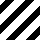
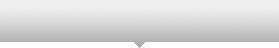
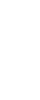
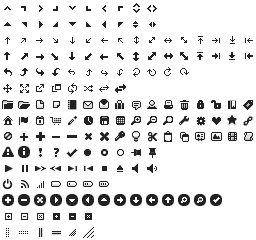
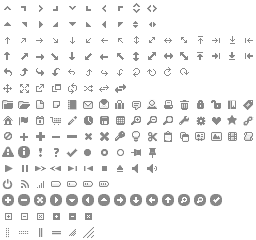
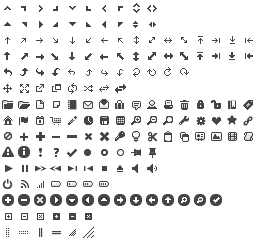
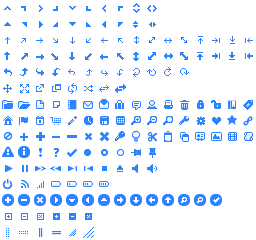
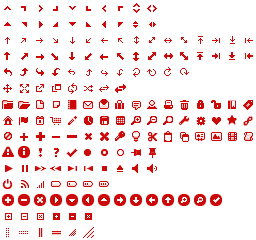
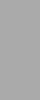
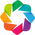
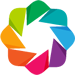
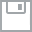
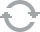
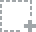
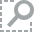
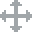
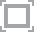
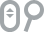

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [138]:
import bokeh.plotting as bkh
from bokeh import mpl

bkh.output_notebook()

ppl.plot(dwork.empleo, linewidth=3)
plt.xticks(dwork.index)
plt.legend(loc='upper left')
bkh.show(mpl.to_bokeh())

http://bokeh.pydata.org/en/latest/docs/reference/charts.html%23bokeh-charts

# GIT WORK-FLOW

In [108]:
datetime.now()

datetime.datetime(2015, 9, 15, 11, 43, 13, 554725)

In [110]:
%%!
git add .
git commit -a -m 'update 9.15.1146'
git push origin master

['[master 2520b3f] update 9.15.1145',
 ' 43 files changed, 9 insertions(+), 1041 deletions(-)',
 ' delete mode 100644 data_work/MCO/evolucion_okun_estacionario_1980_2013.csv',
 ' delete mode 100644 data_work/aux/pair_table.xls',
 ' delete mode 100644 data_work/aux/variables.csv',
 ' delete mode 100644 data_work/filtrado/max/empleo/hp_empleo_1980_2004.xls',
 ' delete mode 100644 data_work/filtrado/max/empleo/hp_empleo_1980_2014.xls',
 ' delete mode 100644 data_work/filtrado/max/empleo/qt_empleo_1980_2004.xls',
 ' delete mode 100644 data_work/filtrado/max/empleo/qt_empleo_1980_2014.xls',
 ' rename data_work/filtrado/max/{data_hp.csv => hp_data.csv} (100%)',
 ' delete mode 100644 data_work/filtrado/max/paro/hp_paro_1980_2004.xls',
 ' delete mode 100644 data_work/filtrado/max/paro/hp_paro_1980_2013.xls',
 ' delete mode 100644 data_work/filtrado/max/paro/qt_paro_1980_2004.xls',
 ' delete mode 100644 data_work/filtrado/max/paro/qt_paro_1980_2013.xls',
 ' delete mode 100644 data_work/filtrado